In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style="darkgrid")

# Load cleaned data
df = pd.read_csv('../data/cleaned/cleaned_data.csv')
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Load tuned models
dt_model = joblib.load('../models/tuned/best_decision_tree.pkl')
rf_model = joblib.load('../models/tuned/best_random_forest.pkl')

# Predict
dt_preds = dt_model.predict(X)
rf_preds = rf_model.predict(X)

# Evaluate
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import root_mean_squared_error
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

dt_rmse, dt_mae, dt_r2 = evaluate_model(y, dt_preds)
rf_rmse, rf_mae, rf_r2 = evaluate_model(y, rf_preds)

print(f"Decision Tree - RMSE: {dt_rmse:.2f}, MAE: {dt_mae:.2f}, R2: {dt_r2:.2f}")
print(f"Random Forest - RMSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}, R2: {rf_r2:.2f}")

Decision Tree - RMSE: 21809.45, MAE: 13778.82, R2: 0.92
Random Forest - RMSE: 17642.15, MAE: 9613.11, R2: 0.95


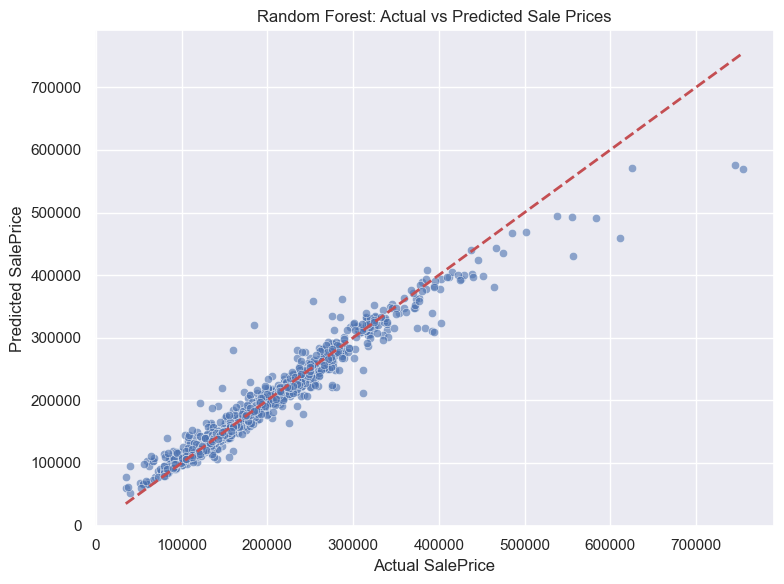

In [3]:
# Plot predicted vs actual for Random Forest
plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=rf_preds, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest: Actual vs Predicted Sale Prices")
plt.tight_layout()
plt.show()

## 📋 Summary & Insights

- Both Decision Tree and Random Forest models were evaluated on the full dataset.
- Random Forest generally outperforms Decision Tree, with lower RMSE and higher R².
- The scatter plot shows strong alignment of predicted vs actual prices, but some variance remains.
- Future improvements could include feature engineering, hyperparameter tuning, or trying more advanced models like Gradient Boosting or XGBoost.
- This project demonstrates the end-to-end ML workflow from data cleaning to evaluation.